# <font color="black"><h3 align="center">Assignment 1 - Multivariate Linear Regression</h3></font>

## Index No - 19001088
## Reg No - 2019/CS/108

## Brief introduction of the data sets

### Forest Fires Data Set

Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [24]:
data_frame = pd.read_csv('forestfires.csv', encoding= 'unicode_escape')

In [25]:
print(data_frame.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Check for NaN under an entire DataFrame

In [31]:
data_frame.isnull().values.any()

False

In [32]:
data_frame.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Encoding categorical data

In [34]:
#label encoding & removing biased records
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_frame['month']= label_encoder.fit_transform(data_frame['month'])
data_frame['day']= label_encoder.fit_transform(data_frame['day'])

In [35]:
print(data_frame)

     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [36]:
#standardization
for i in range(0,12):
  maximum = max(data_frame.iloc[:, i])
  data_frame.iloc[:, i] /= maximum
df = data_frame.values

In [37]:
print(df)

[[ 0.77777778  0.55555556  0.63636364 ...  0.71276596  0.
   0.        ]
 [ 0.77777778  0.44444444  0.90909091 ...  0.09574468  0.
   0.        ]
 [ 0.77777778  0.44444444  0.90909091 ...  0.13829787  0.
   0.        ]
 ...
 [ 0.77777778  0.44444444  0.09090909 ...  0.71276596  0.
  11.16      ]
 [ 0.11111111  0.44444444  0.09090909 ...  0.42553191  0.
   0.        ]
 [ 0.66666667  0.33333333  0.81818182 ...  0.4787234   0.
   0.        ]]


In [39]:
X = df[:, :-1]
y = df[:, -1]

In [40]:
X

array([[0.77777778, 0.55555556, 0.63636364, ..., 0.51      , 0.71276596,
        0.        ],
       [0.77777778, 0.44444444, 0.90909091, ..., 0.33      , 0.09574468,
        0.        ],
       [0.77777778, 0.44444444, 0.90909091, ..., 0.33      , 0.13829787,
        0.        ],
       ...,
       [0.77777778, 0.44444444, 0.09090909, ..., 0.7       , 0.71276596,
        0.        ],
       [0.11111111, 0.44444444, 0.09090909, ..., 0.42      , 0.42553191,
        0.        ],
       [0.66666667, 0.33333333, 0.81818182, ..., 0.31      , 0.4787234 ,
        0.        ]])

## Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
#hyperparamters
import random
learning_rate = 0.01
initial_theta = []
for i in range(12):
  initial_theta.append(random.uniform(0.0, 100.0))
num_iterations = 100
initial_theta

[77.86569623979034,
 36.85141406111266,
 71.46350496374725,
 32.41833618477473,
 0.2936779311095039,
 64.87076971279218,
 9.83330666311698,
 13.788697582754217,
 53.88245014426315,
 48.27069070788036,
 35.94557081761519,
 19.80861499715141]

In [49]:
#cost function - theta[0] is a the constant
def compute_cost(theta, data, target):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(target))
    
    # Compute sum of squared errors
    for i in range(len(target)):
        predicted_value = theta[0]
        for j in range (1,len(theta)):
          predicted_value += data[i, j-1]*theta[j]
        total_cost += (target[i] - predicted_value) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

In [50]:
def step_gradient(current_theta, data, target, alpha):
    
    theta_gradient = np.zeros(12)
    N = float(len(target))

    # Calculate Gradient
    for i in range(len(target)):
        predicted_value = current_theta[0]
        for j in range (1,len(current_theta)):
          predicted_value += data[i, j-1]*current_theta[j]
        theta_gradient[0] += - (2/N) * (target[i] - predicted_value)
        for j in range (1, len(theta_gradient)):
          theta_gradient[j] += - (2/N) * data[i, j-1] * (target[i] - predicted_value)
    
    # Update current theta
    updated_theta = np.zeros(12)
    for j in range (0,len(current_theta)):
      updated_theta[j] = current_theta[j] - alpha * theta_gradient[j]

    #Return updated parameters
    return updated_theta

In [51]:
def gradient_descent(data, target, starting_theta, learning_rate, num_iterations):
    
    # initial values
    theta = []
    for i in starting_theta:
        theta.append(i)
    theta = np.array(theta)

    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of theta parameters after each iteration 
    theta_progress = [starting_theta]
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(theta, data, target))
        theta = step_gradient(theta, data, target, learning_rate)
        theta_progress.append(theta)
        
    return [theta, cost_graph, theta_progress]

### Run gradient_descent() to get optimized theta parameters

In [53]:
theta, cost_graph, theta_progress = gradient_descent(x_train, y_train, initial_theta, learning_rate, num_iterations)

#Print optimized parameters
for i in range(len(theta)):
  print("Optimized theta%d: %.4f" % (i, theta[i]))

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(theta, x_train, y_train))

Optimized theta0: 10.6771
Optimized theta1: 1.3095
Optimized theta2: 38.3856
Optimized theta3: -2.8770
Optimized theta4: -24.4116
Optimized theta5: 1.8365
Optimized theta6: -12.0071
Optimized theta7: -23.9470
Optimized theta8: 42.9261
Optimized theta9: 12.1242
Optimized theta10: 5.2808
Optimized theta11: -8.6415
Minimized cost: 1084.5787771575845


## Plotting the cost per iteration

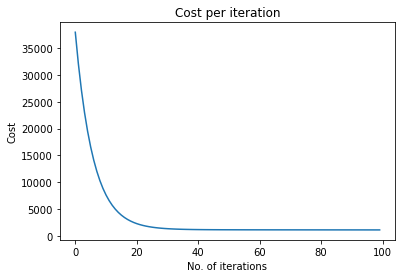

In [54]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [55]:
#predicting values
def predict_values(theta, data):

  predicted_target = []

  for i in range(len(data)):
    predicted_value = theta[0]
    for j in range (1,len(theta)):
      predicted_value += data[i, j-1]*theta[j]
    predicted_target.append(predicted_value)

  return predicted_target  

## Predicting the Test set results

In [57]:
#do predictions
predicted_target = predict_values(theta, x_test)

print(predicted_target)

[20.151736693130214, 24.600160237865158, 14.495910208292916, -8.533599586250407, 4.052113017072383, 22.42733105788046, 16.573476843873827, 5.692110837871823, 8.680611344758018, 27.17700995586706, 0.21794800989846086, 11.539390971989345, 12.13700757587823, 26.458753758769415, 5.82346107823396, 17.537357584571282, 13.711276673912575, 17.097374613139593, 8.495145763622622, 15.822454915463917, 16.129384856214507, 2.4044830223198708, 27.909055614213493, -2.245114219281397, -12.075947063596937, 8.677642325765312, 7.921316654066226, 5.84369305671158, -6.523477818744134, 13.400013217637358, 18.563368023068918, 6.34316254567028, 9.420013408054864, 24.92846930851615, 10.319655118856016, 16.1850651600466, 16.86375528257712, 15.894012219015426, 13.337383777731143, 23.60568218704525, 4.105525361220914, 5.524641767439373, 0.46296418557196883, 12.619865755715397, 5.298086164737002, 16.91165277417588, 5.386819229179273, 12.877763736236826, -13.089395652792831, 16.62487654816529, 6.0021247552864, 4.661

In [65]:
#convert list object into numpy.ndarray
predicted_target = np.array(predicted_target)

## Compare the predicted values and real values

In [66]:
np.set_printoptions(precision=2)
print(np.concatenate((predicted_target.reshape(len(predicted_target),1), y_test.reshape(len(y_test),1)),1))

[[ 2.02e+01  2.74e+01]
 [ 2.46e+01  0.00e+00]
 [ 1.45e+01  2.18e+00]
 [-8.53e+00  8.85e+01]
 [ 4.05e+00  2.69e+00]
 [ 2.24e+01  0.00e+00]
 [ 1.66e+01  1.94e+00]
 [ 5.69e+00  0.00e+00]
 [ 8.68e+00  1.63e+01]
 [ 2.72e+01  0.00e+00]
 [ 2.18e-01  2.47e+00]
 [ 1.15e+01  2.20e+01]
 [ 1.21e+01  1.01e+01]
 [ 2.65e+01  0.00e+00]
 [ 5.82e+00  1.83e+01]
 [ 1.75e+01  0.00e+00]
 [ 1.37e+01  1.56e+00]
 [ 1.71e+01  4.33e+01]
 [ 8.50e+00  1.10e+00]
 [ 1.58e+01  7.36e+00]
 [ 1.61e+01  0.00e+00]
 [ 2.40e+00  3.33e+00]
 [ 2.79e+01  4.62e+00]
 [-2.25e+00  5.83e+00]
 [-1.21e+01  7.08e+01]
 [ 8.68e+00  2.42e+01]
 [ 7.92e+00  0.00e+00]
 [ 5.84e+00  0.00e+00]
 [-6.52e+00  0.00e+00]
 [ 1.34e+01  0.00e+00]
 [ 1.86e+01  0.00e+00]
 [ 6.34e+00  3.20e+00]
 [ 9.42e+00  0.00e+00]
 [ 2.49e+01  8.59e+00]
 [ 1.03e+01  5.86e+00]
 [ 1.62e+01  1.96e+02]
 [ 1.69e+01  0.00e+00]
 [ 1.59e+01  1.56e+00]
 [ 1.33e+01  1.09e+03]
 [ 2.36e+01  0.00e+00]
 [ 4.11e+00  5.43e+01]
 [ 5.52e+00  0.00e+00]
 [ 4.63e-01  4.10e-01]
 [ 1.26e+01

# <font color="black"><h3 align="center">Assignment 1 - Logistics Regression</h3></font>

## Importing the libraries

In [67]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## Brief introduction of the data sets

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields. and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

## Importing the dataset

In [101]:
data_frame = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv', encoding= 'unicode_escape',header=0)

In [102]:
data_frame.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Remove NaN values under an entire DataFrame

In [103]:
data_frame = data_frame.dropna()

In [104]:
data_frame['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

The education column of the dataset has many categories and we need to reduce the categories for a better modelling.
Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [105]:
data_frame['education']=np.where(data_frame['education'] =='basic.9y', 'Basic', data_frame['education'])
data_frame['education']=np.where(data_frame['education'] =='basic.6y', 'Basic', data_frame['education'])
data_frame['education']=np.where(data_frame['education'] =='basic.4y', 'Basic', data_frame['education'])

In [106]:
data_frame['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Data exploration

In [107]:
data_frame['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

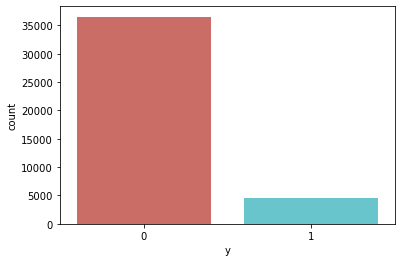

In [108]:
sns.countplot(x='y',data=data_frame,palette='hls')
plt.show()

In [109]:
count_no_subscription = len(data_frame[data_frame['y']==0])
count_subscription = len(data_frame[data_frame['y']==1])
percentage_of_no_subscription = count_no_subscription/(count_no_subscription + count_subscription)
print("percentage of no subscription is", percentage_of_no_subscription*100)
percentage_of_subscription = count_subscription/(count_no_subscription + count_subscription)
print("percentage of subscription", percentage_of_subscription*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


#### Our classes are imbalanced. So we can do some more exploration.

In [110]:
data_frame.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#### We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [111]:
data_frame.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [112]:
data_frame.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [113]:
data_frame.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


### Visualizations

Text(0, 0.5, 'Frequency of Purchase')

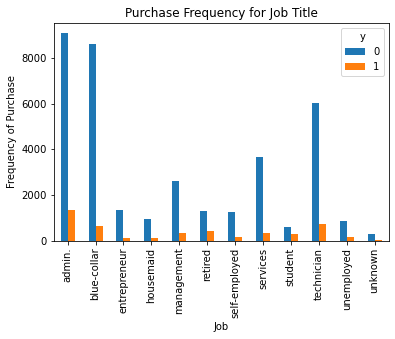

In [114]:
%matplotlib inline
pd.crosstab(data_frame['job'],data_frame['y']).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

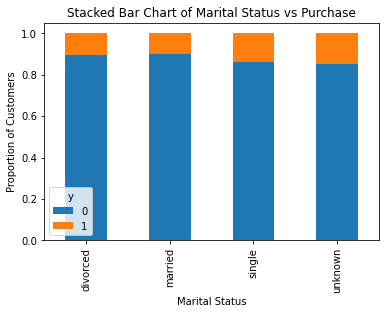

In [115]:
table=pd.crosstab(data_frame['marital'],data_frame['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### The marital status does not seem a strong predictor for the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

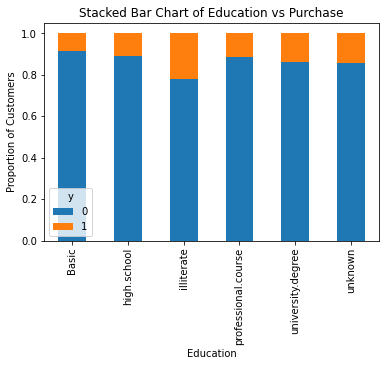

In [116]:
table=pd.crosstab(data_frame['education'],data_frame['y'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

### Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

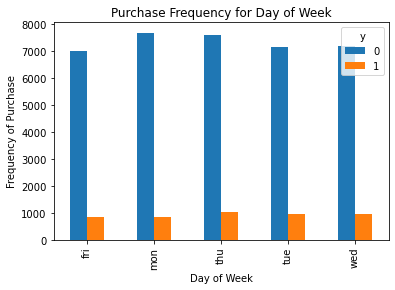

In [117]:
pd.crosstab(data_frame['day_of_week'],data_frame['y']).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

### Day of week may not be a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

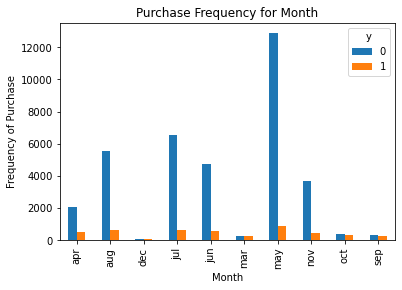

In [118]:
pd.crosstab(data_frame['month'],data_frame['y']).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

### Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

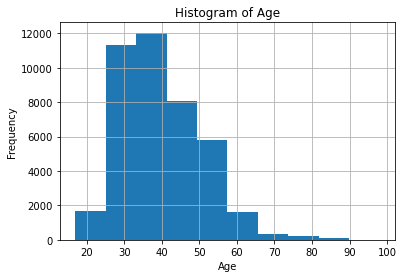

In [119]:
data_frame['age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Most of the customers of the bank in this dataset are in the age range of 30–40.

Text(0, 0.5, 'Frequency of Purchase')

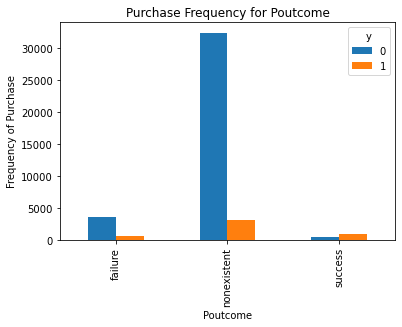

In [120]:
pd.crosstab(data_frame['poutcome'],data_frame['y']).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

### Poutcome seems to be a good predictor of the outcome variable.

## That is variables with only two values, zero and one.

In [121]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_frame[var], prefix=var)
    data1=data_frame.join(cat_list)
    data_frame=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data_frame.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [122]:
data_frame_final=data_frame[to_keep]
data_frame_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [125]:
X = data_frame_final.loc[:, data_frame_final.columns != 'y']
y = data_frame_final.loc[:, data_frame_final.columns == 'y']

In [126]:
# from imblearn.over_sampling import SMOTE

# os = SMOTE(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# columns = X_train.columns
# os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

## Recursive Feature Elimination

In [ ]:
# data_final_vars=data_frame_final.columns.values.tolist()
# y=['y']
# X=[i for i in data_final_vars if i not in y]
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
# rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

In [ ]:
# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
#       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
# X=os_data_X[cols]
# y=os_data_y['y']

## Implementing the model

In [127]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())

         Current function value: 0.207332
         Iterations: 35


C:\Users\yohan nayanjith\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.411     
Dependent Variable:           y                          AIC:                        17181.1442
Date:                         2022-07-16 01:25           BIC:                        17621.0653
No. Observations:             41188                      Log-Likelihood:             -8539.6   
Df Model:                     50                         LL-Null:                    -14499.   
Df Residuals:                 41137                      LLR p-value:                0.0000    
Converged:                    0.0000                     Scale:                      1.0000    
No. Iterations:               35.0000                                                          
-----------------------------------------------------------------------------------------------
                               Coef.     Std.Err.       z     P>|z|      [0.025  

In [128]:
# cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
#       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
#       'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
# X=os_data_X[cols]
# y=os_data_y['y']
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())

NameError: name 'os_data_X' is not defined

## Logistic Regression Model Fitting

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\yohan nayanjith\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\yohan nayanjith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting the test set results and calculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

## Compute precision, recall, F-measure and support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()